# Wirujące wahadło

Rozpatrzmy wahadło (pręt o długości $l$, na końcu którego jest zawierzona masa $m$), które zostało zamocowane na obracającej z częstością $\omega$ się podstawie.
1. Wyprowadź wyrażenie na zależność energii potencjalnej wahadła w zależności od kąta wychylenia $\phi$. 
2. Wykreśl zależność energii potencjalnej od wychylenia i od częstości obrotów dla ustalonych wartości $l$ i $m$ ($l=1$, $m$=1).
3. Różniczkując energię potencjalną po kącie wychylenia oblicz moment skręcający.
4. Wyznać takie wartości kąta wychylenia, dla których moment skręcający się zeruje (ekstrema energii potencjalnej). Zinterpretuj otrzymane rozwiązania.
5. Korzystając z postawienia $\phi=\phi_0+\psi$ i rozwijając energię potencjalną wzgledem $\psi$ znajdź przybliżone wyrażenia na zależność energii potencjalnej $U$ od wartości $\psi$ (w otoczeniu $\phi_0$).
6. Znajdź wyrażenia opisujące częstości małych drgań wahadła wokół jego położeń równowagi dla różnych wartości $\omega$ i wykreśl te wyrażenia.

In [2]:
g = var('g')
m = var('m')
l = var('l')
v = var('v')
R = var('R')
omega = var('omega')
theta = var('theta')
Theta = var('Theta')
Fg = var('Fg')
Fgs = var('Fgs')
Fr = var('Fr')

l=1
m=1
g=1

R = l*sin(theta)
v = omega * R
Fg = m*g

Fgs= -Fg*sin(theta)
Fr = m*v^2/R
Frs = Fr * cos(theta)
Fs = Fgs+Frs

assume(Theta>0)

In [3]:
show(expand(Fs))

omega^2*cos(theta)*sin(theta) - sin(theta)

In [4]:
U = integrate(-l*Fs, (theta, 0, Theta))

In [5]:
show(U)

1/2*(cos(Theta)^2 - 1)*omega^2 - cos(Theta) + 1

In [6]:
P0 = plot3d(U, (Theta, -pi, pi), (omega, 0, 2), aspect_ratio=[0.2,1,0.2])
show(P0)

Graphics3d Object

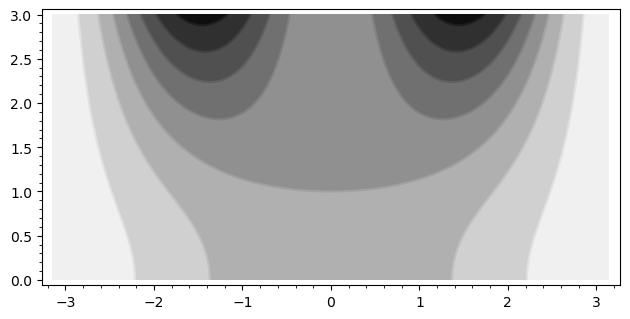

In [7]:
C0 = contour_plot(U, (Theta, -pi, pi), (omega, 0, 3))
show(C0)

In [8]:
forget()
#assume(Theta<0)

T = var('T')
T = diff(U, Theta) 

eq1=T==0
show(eq1)

-omega^2*cos(Theta)*sin(Theta) + sin(Theta) == 0

In [9]:
extr_phi = var('extr_phi')
extr_phi = solve(eq1, Theta, explicit_solutions=True)
show(extr_phi)

[Theta == arccos(omega^(-2)), Theta == 0]

In [10]:
sol1 = extr_phi[0].right_hand_side()
show(sol1)
sol2 = -extr_phi[0].right_hand_side() # bo cosinus jest f. parzystą
show(sol2)
sol3 = extr_phi[1].right_hand_side()
show(sol3)

arccos(omega^(-2))

-arccos(omega^(-2))

0

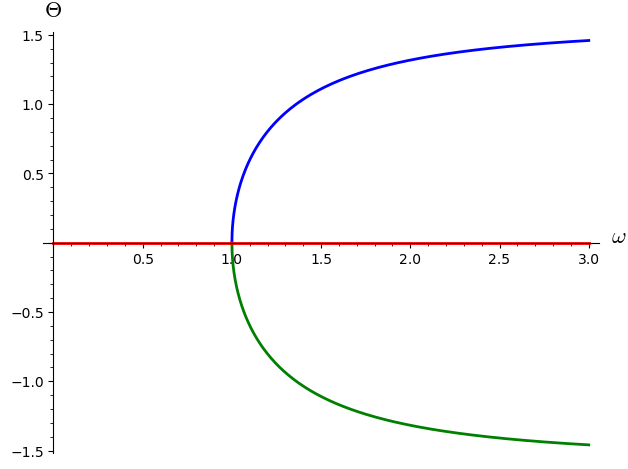

In [11]:
g = Graphics()
g += plot(sol1, (omega, 1, 3), color = 'blue', thickness=2)
g += plot(sol2, (omega, 1, 3), color = 'green', thickness=2)
g += plot(sol3, (omega, 0, 3), color = 'red', thickness=2, axes_labels=[r'$\omega$', r'$\Theta$'])

g.show()

In [12]:
zeta = var('zeta')
U1lin = U.subs(Theta==sol3+zeta).taylor(zeta, 0, 3)
show(U1lin)
U1linPlot = U1lin.subs(zeta==Theta - sol3)

-1/2*(omega^2 - 1)*zeta^2

In [13]:
P3 = plot3d(U1linPlot, (Theta, -pi, pi), (omega, 0, 2), aspect_ratio=[0.2,1,0.2]) 
show(P3)

Graphics3d Object

In [14]:
g1 = Graphics()
g1 += P0
g1 += P3
g1.show()

Graphics3d Object

In [15]:
U2lin = U.subs(Theta==sol1+zeta).taylor(zeta, 0, 3)
show(U2lin)
U2linPlot = U2lin.subs(zeta==Theta - sol1)

U3lin = U.subs(Theta==sol2+zeta).taylor(zeta, 0, 3)
show(U3lin)
U3linPlot = U3lin.subs(zeta==Theta - sol2)

1/2*zeta^3*sqrt((omega^4 - 1)/omega^4) + 1/2*(omega^4 - 1)*zeta^2/omega^2 - 1/2*(omega^4 - 2*omega^2 + 1)/omega^2

-1/2*zeta^3*sqrt((omega^4 - 1)/omega^4) + 1/2*(omega^4 - 1)*zeta^2/omega^2 - 1/2*(omega^4 - 2*omega^2 + 1)/omega^2

In [16]:
P4 = plot3d(U2linPlot, (Theta, -pi, pi), (omega, 0, 2), aspect_ratio=[0.2,1,0.2]) 
show(P4)

Graphics3d Object

In [17]:
P5 = plot3d(U3linPlot, (Theta, -pi, pi), (omega, 0, 2), aspect_ratio=[0.2,1,0.2]) 
show(P5)

Graphics3d Object

In [18]:
g1 = Graphics()
g1 += P0
g1 += P4
g1 += P5
g1.show()

Graphics3d Object

In [19]:
show(U2lin)

1/2*zeta^3*sqrt((omega^4 - 1)/omega^4) + 1/2*(omega^4 - 1)*zeta^2/omega^2 - 1/2*(omega^4 - 2*omega^2 + 1)/omega^2

In [20]:
om1 = var('om1')
om2 = var('om2')
om3 = var('om3')

om1 = sqrt(2*U1lin.coefficients(zeta)[0][0])
show(om1)

om2 = sqrt(2*U2lin.coefficients(zeta)[1][0])
show(om2)

om3 = sqrt(2*U3lin.coefficients(zeta)[1][0])
show(om3)

sqrt(-omega^2 + 1)

sqrt((omega^4 - 1)/omega^2)

sqrt((omega^4 - 1)/omega^2)

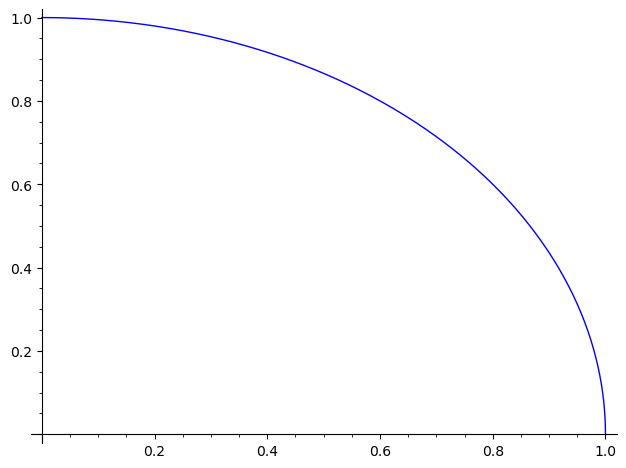

In [21]:
g2 = Graphics()
pom1 = plot(om1, (omega, 0, 1))
g2 += pom1 
show(pom1)

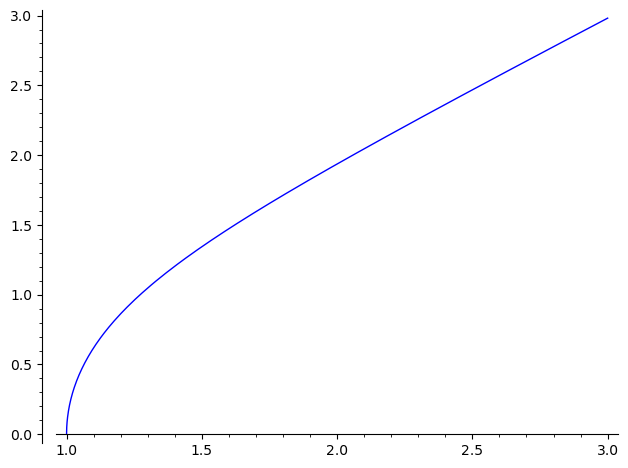

In [22]:
pom2 = plot(om2, (omega, 1, 3))
show(pom2)
g2 += pom2

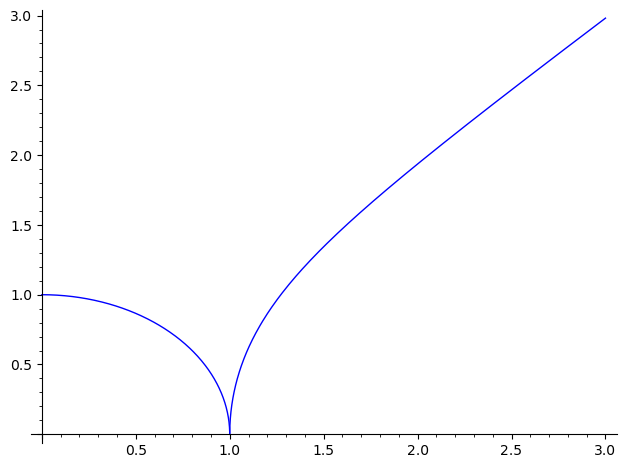

In [23]:
show(g2)